**Investigating Cervical Cancer**

Risk Classification of Cervical Cancer

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import math
import seaborn as sns

In [ ]:
cancer_df = pd.read_csv('/content/risk_factors_cervical_cancer.csv')
cancer_df.head()

,Age,Number of sexual partners,First sexual intercourse,Num of pregnancies,Smokes,Smokes (years),Smokes (packs/year),Hormonal Contraceptives,Hormonal Contraceptives (years),IUD,...,STDs: Time since first diagnosis,STDs: Time since last diagnosis,Dx:Cancer,Dx:CIN,Dx:HPV,Dx,Hinselmann,Schiller,Citology,Biopsy
0,18,4.0,15.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,?,?,0,0,0,0,0,0,0,0
1,15,1.0,14.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,?,?,0,0,0,0,0,0,0,0
2,34,1.0,?,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,?,?,0,0,0,0,0,0,0,0
3,52,5.0,16.0,4.0,1.0,37.0,37.0,1.0,3.0,0.0,...,?,?,1,0,1,0,0,0,0,0
4,46,3.0,21.0,4.0,0.0,0.0,0.0,1.0,15.0,0.0,...,?,?,0,0,0,0,0,0,0,0


In [ ]:
len(cancer_df)

858

In [ ]:
cancer_df.keys()

Index(['Age', 'Number of sexual partners', 'First sexual intercourse',
       'Num of pregnancies', 'Smokes', 'Smokes (years)', 'Smokes (packs/year)',
       'Hormonal Contraceptives', 'Hormonal Contraceptives (years)', 'IUD',
       'IUD (years)', 'STDs', 'STDs (number)', 'STDs:condylomatosis',
       'STDs:cervical condylomatosis', 'STDs:vaginal condylomatosis',
       'STDs:vulvo-perineal condylomatosis', 'STDs:syphilis',
       'STDs:pelvic inflammatory disease', 'STDs:genital herpes',
       'STDs:molluscum contagiosum', 'STDs:AIDS', 'STDs:HIV',
       'STDs:Hepatitis B', 'STDs:HPV', 'STDs: Number of diagnosis',
       'STDs: Time since first diagnosis', 'STDs: Time since last diagnosis',
       'Dx:Cancer', 'Dx:CIN', 'Dx:HPV', 'Dx', 'Hinselmann', 'Schiller',
       'Citology', 'Biopsy'],
      dtype='object')

In [ ]:
cancer_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 858 entries, 0 to 857
Data columns (total 36 columns):
 #   Column                              Non-Null Count  Dtype 
---  ------                              --------------  ----- 
 0   Age                                 858 non-null    int64 
 1   Number of sexual partners           858 non-null    object
 2   First sexual intercourse            858 non-null    object
 3   Num of pregnancies                  858 non-null    object
 4   Smokes                              858 non-null    object
 5   Smokes (years)                      858 non-null    object
 6   Smokes (packs/year)                 858 non-null    object
 7   Hormonal Contraceptives             858 non-null    object
 8   Hormonal Contraceptives (years)     858 non-null    object
 9   IUD                                 858 non-null    object
 10  IUD (years)                         858 non-null    object
 11  STDs                                858 non-null    object

In [ ]:
cancer_df = cancer_df.replace('?', np.NaN)

In [ ]:
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler

scaler=StandardScaler()

In [ ]:
scaler.fit(cancer_df)
scaled_data=scaler.transform(cancer_df)

scaled_data

array([[-1.03856336e+00,  8.83365098e-01, -7.12172641e-01, ...,
        -3.07225902e-01, -2.32495277e-01, -2.61711961e-01],
       [-1.39179566e+00, -9.16536358e-01, -1.06909780e+00, ...,
        -3.07225902e-01, -2.32495277e-01, -2.61711961e-01],
       [ 8.45342268e-01, -9.16536358e-01,             nan, ...,
        -3.07225902e-01, -2.32495277e-01, -2.61711961e-01],
       ...,
       [-2.14354647e-01, -3.16569206e-01,  1.67767407e-03, ...,
        -3.07225902e-01,  4.30116263e+00, -2.61711961e-01],
       [ 7.27598166e-01, -3.16569206e-01,  2.50015378e+00, ...,
        -3.07225902e-01, -2.32495277e-01, -2.61711961e-01],
       [ 2.56621760e-01, -3.16569206e-01,  1.07245315e+00, ...,
        -3.07225902e-01, -2.32495277e-01, -2.61711961e-01]])

In [ ]:
#PCA
import pandas as pd
from sklearn.decomposition import PCA

# Assuming you have the DataFrame 'cancer_df' with the appropriate data

# Fill NaN values with 0 and convert to integers
scaled_data = cancer_df.fillna(0)

# Create a PCA instance with 2 principal components
pca = PCA(n_components=2)

# Fit and transform the data to the new 2-dimensional space
pca_result = pca.fit_transform(scaled_data)

# Create a new DataFrame with the PCA results
pca_df = pd.DataFrame(data=pca_result, columns=['PCA Component 1', 'PCA Component 2'])

print(pca_df)


     PCA Component 1  PCA Component 2
0          -9.330747         0.245257
1         -12.405346         0.540810
2           4.319156         1.140587
3          30.886982        43.113991
4          20.848255        -4.805686
..               ...              ...
853         6.383811        -2.291738
854         5.793896        -2.653161
855        -2.433848        -1.149097
856         6.295131        -3.424719
857         1.932474        -2.204483

[858 rows x 2 columns]


In [ ]:
pca.fit(scaled_data)

PCA(n_components=2)

In [ ]:
scaled_data.shape

(858, 36)

In [ ]:
x_pca=pca.transform(scaled_data)
x_pca.shape

(858, 2)

In [ ]:
scaled_data

,Age,Number of sexual partners,First sexual intercourse,Num of pregnancies,Smokes,Smokes (years),Smokes (packs/year),Hormonal Contraceptives,Hormonal Contraceptives (years),IUD,...,STDs: Time since first diagnosis,STDs: Time since last diagnosis,Dx:Cancer,Dx:CIN,Dx:HPV,Dx,Hinselmann,Schiller,Citology,Biopsy
0,18,4.0,15.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0,0,0,0,0,0,0,0,0,0
1,15,1.0,14.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0,0,0,0,0,0,0,0,0,0
2,34,1.0,0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0,0,0,0,0,0,0,0,0,0
3,52,5.0,16.0,4.0,1.0,37.0,37.0,1.0,3.0,0.0,...,0,0,1,0,1,0,0,0,0,0
4,46,3.0,21.0,4.0,0.0,0.0,0.0,1.0,15.0,0.0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
853,34,3.0,18.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0,0,0,0,0,0,0,0,0,0
854,32,2.0,19.0,1.0,0.0,0.0,0.0,1.0,8.0,0.0,...,0,0,0,0,0,0,0,0,0,0
855,25,2.0,17.0,0.0,0.0,0.0,0.0,1.0,0.08,0.0,...,0,0,0,0,0,0,0,0,1,0
856,33,2.0,24.0,2.0,0.0,0.0,0.0,1.0,0.08,0.0,...,0,0,0,0,0,0,0,0,0,0


Text(0, 0.5, 'Second Principle component')

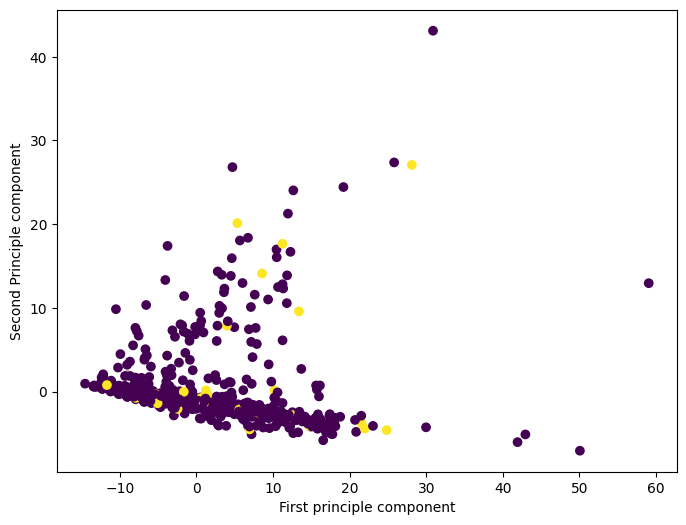

In [ ]:
import matplotlib.pyplot as plt
plt.figure(figsize=(8,6))
plt.scatter(x_pca[:,0],x_pca[:,1],c=cancer_df['Biopsy'])
plt.xlabel('First principle component')
plt.ylabel('Second Principle component')

In [ ]:
cancer_df.drop(['STDs: Time since first diagnosis','STDs: Time since last diagnosis'],inplace=True,axis=1)

In [ ]:
cancer_df = cancer_df.replace('?', np.NaN)

In [ ]:
numerical_df = ['Age', 'Number of sexual partners', 'First sexual intercourse','Num of pregnancies', 'Smokes (years)',
                'Smokes (packs/year)','Hormonal Contraceptives (years)','IUD (years)','STDs (number)']

categorical_df = ['Smokes','Hormonal Contraceptives','IUD','STDs','STDs:condylomatosis','STDs:cervical condylomatosis',
                  'STDs:vaginal condylomatosis','STDs:vulvo-perineal condylomatosis', 'STDs:syphilis',
                  'STDs:pelvic inflammatory disease', 'STDs:genital herpes','STDs:molluscum contagiosum', 'STDs:AIDS',
                  'STDs:HIV','STDs:Hepatitis B', 'STDs:HPV', 'STDs: Number of diagnosis','Dx:Cancer', 'Dx:CIN',
                  'Dx:HPV', 'Dx', 'Hinselmann', 'Schiller','Citology', 'Biopsy']

In [ ]:
cancer_df = cancer_df.replace('?', np.NaN)
print(cancer_df)

     Age Number of sexual partners First sexual intercourse  \
0     18                       4.0                     15.0   
1     15                       1.0                     14.0   
2     34                       1.0                      NaN   
3     52                       5.0                     16.0   
4     46                       3.0                     21.0   
..   ...                       ...                      ...   
853   34                       3.0                     18.0   
854   32                       2.0                     19.0   
855   25                       2.0                     17.0   
856   33                       2.0                     24.0   
857   29                       2.0                     20.0   

    Num of pregnancies Smokes Smokes (years) Smokes (packs/year)  \
0                  1.0    0.0            0.0                 0.0   
1                  1.0    0.0            0.0                 0.0   
2                  1.0    0.0          

In [ ]:
import pandas as pd

for feature in numerical_df:
    print(feature, '', pd.to_numeric(cancer_df[feature], errors='coerce').mean())
    feature_mean = round(pd.to_numeric(cancer_df[feature], errors='coerce').mean(), 1)
    cancer_df[feature] = pd.to_numeric(cancer_df[feature], errors='coerce').fillna(feature_mean)

Age  26.82051282051282
Number of sexual partners  2.527644230769231
First sexual intercourse  16.995299647473562
Num of pregnancies  2.275561097256858
Smokes (years)  1.219721412585799
Smokes (packs/year)  0.4531439506492308
Hormonal Contraceptives (years)  2.2564192013893334
IUD (years)  0.5148043184885289
STDs (number)  0.17662682602921648


In [ ]:
import pandas as pd

for feature in categorical_df:
    cancer_df[feature] = pd.to_numeric(cancer_df[feature], errors='coerce').fillna(1.0)

In [ ]:
category_df = ['Hinselmann', 'Schiller','Citology', 'Biopsy']

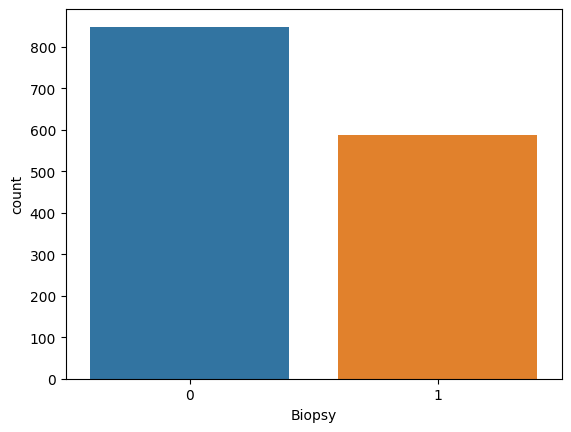

In [ ]:
import seaborn as sns

for feature in categorical_df:
    sns.countplot(x=feature, data=cancer_df)

/usr/local/lib/python3.10/dist-packages/seaborn/axisgrid.py:447: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`). Consider using `matplotlib.pyplot.close()`.
  fig = plt.figure(figsize=figsize)


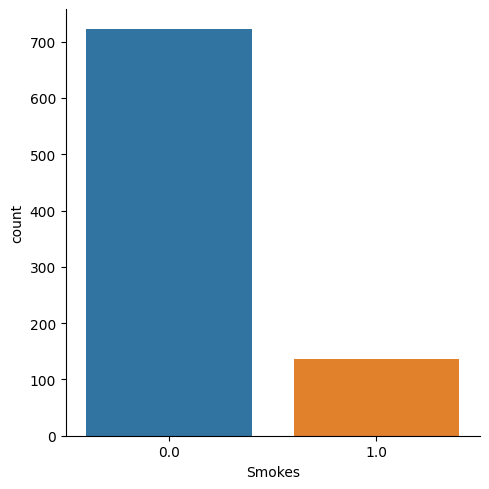

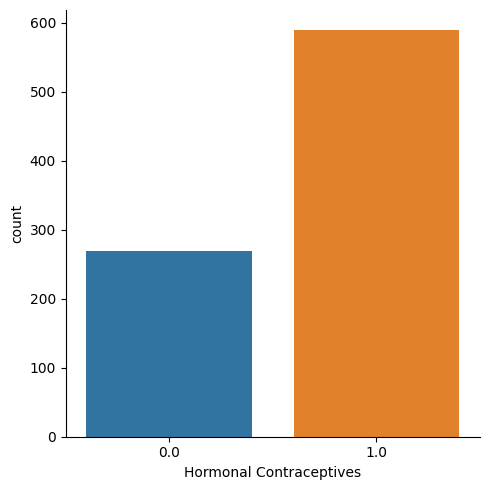

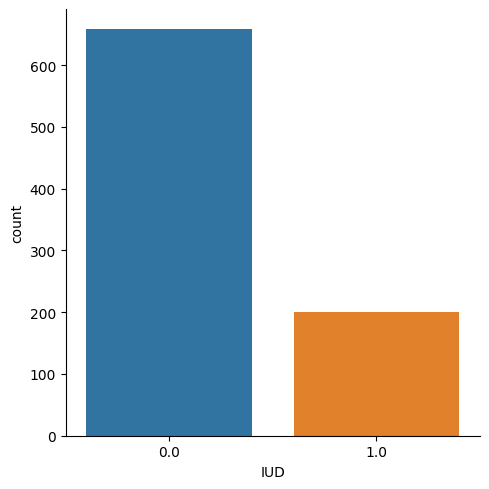

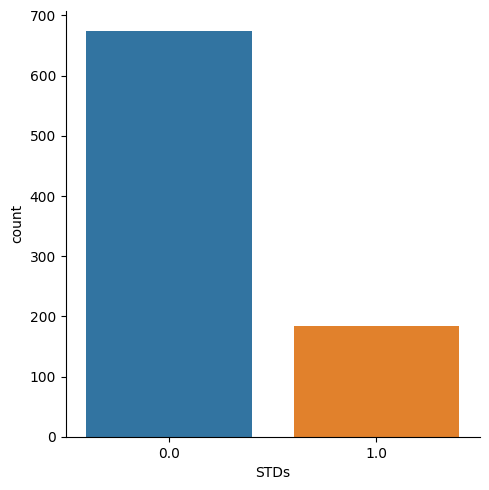

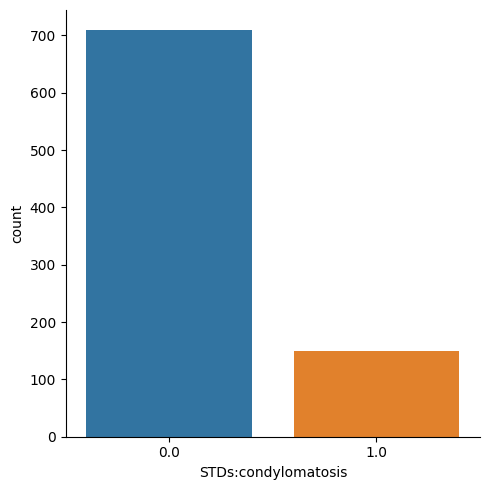

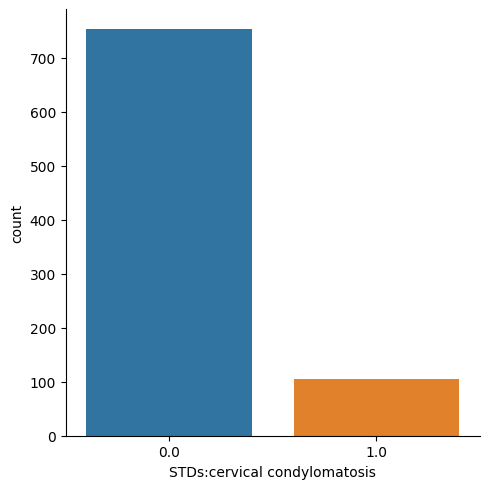

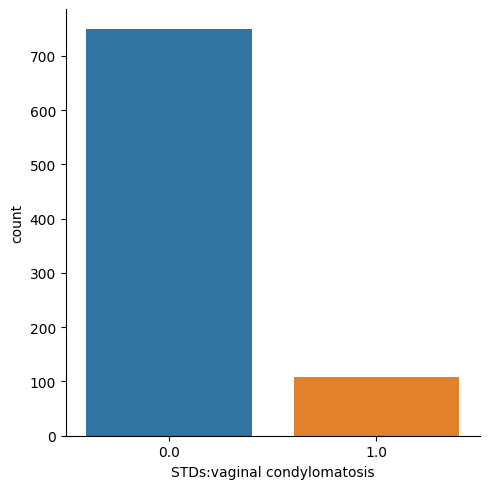

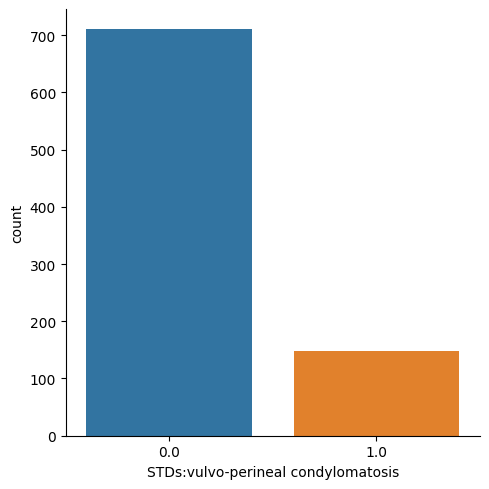

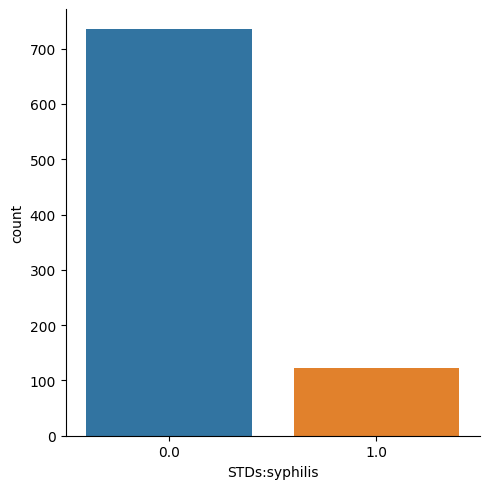

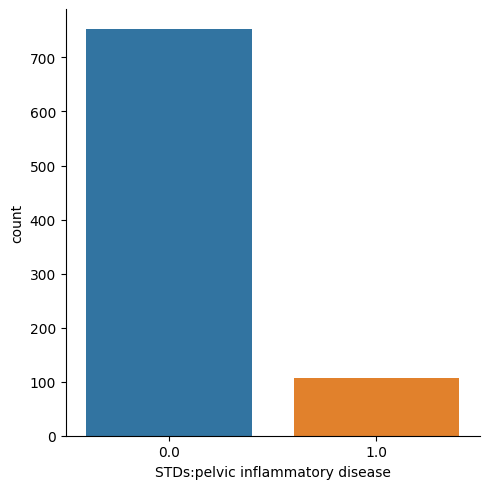

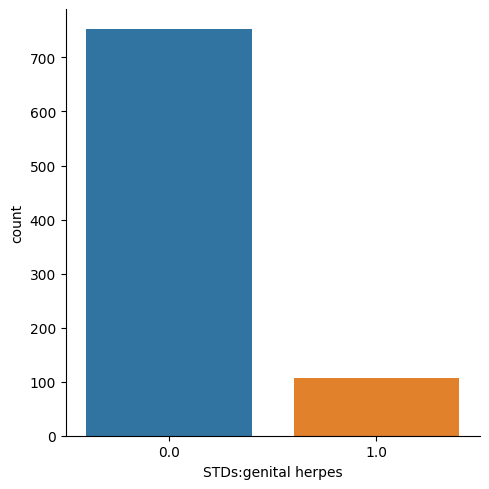

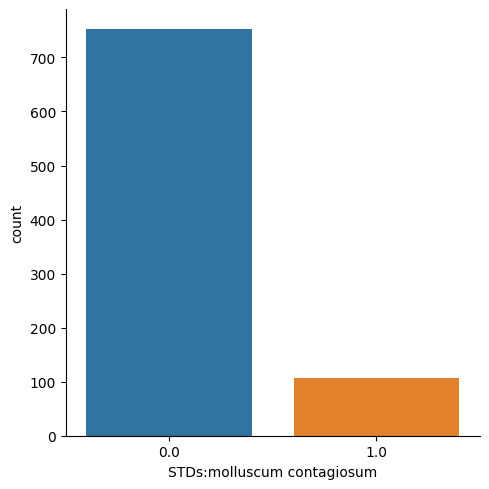

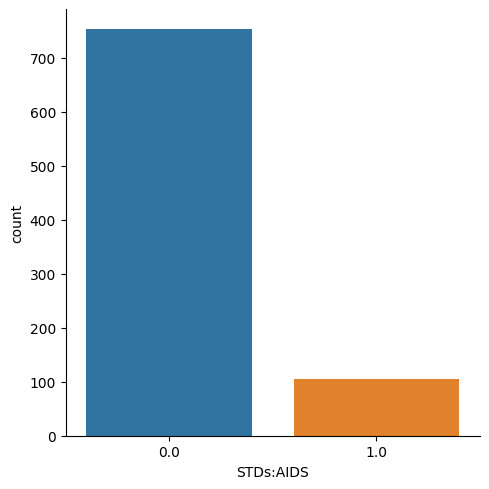

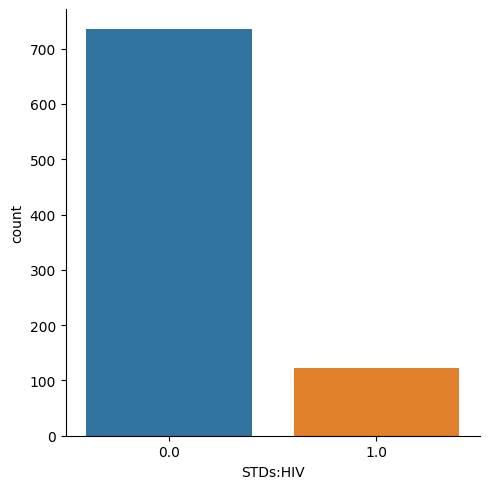

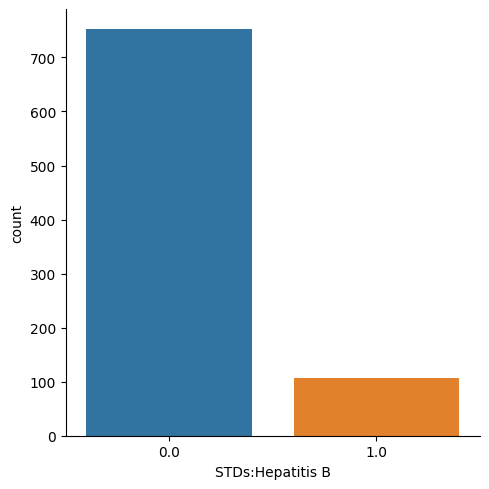

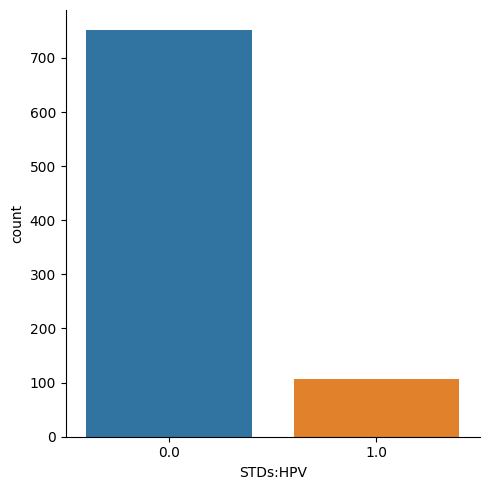

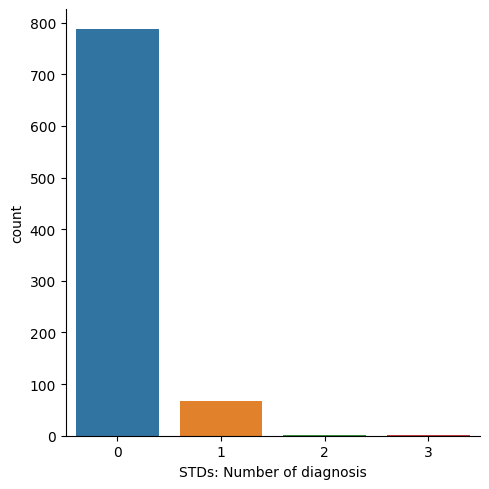

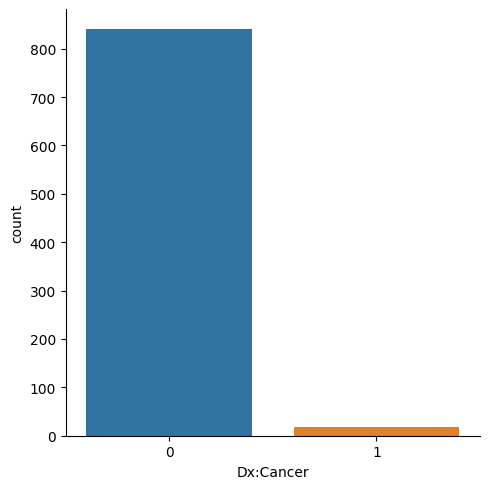

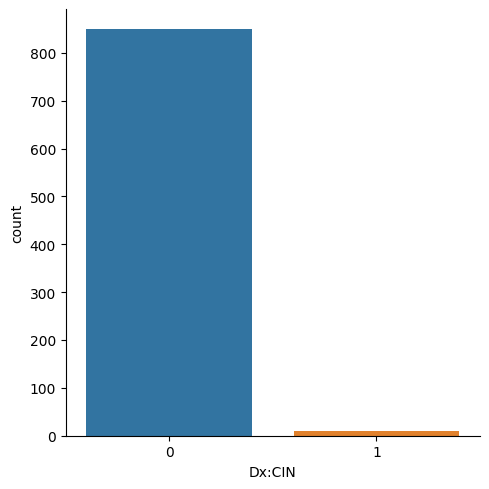

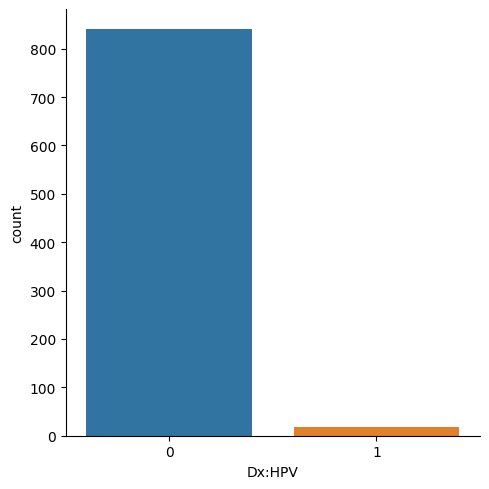

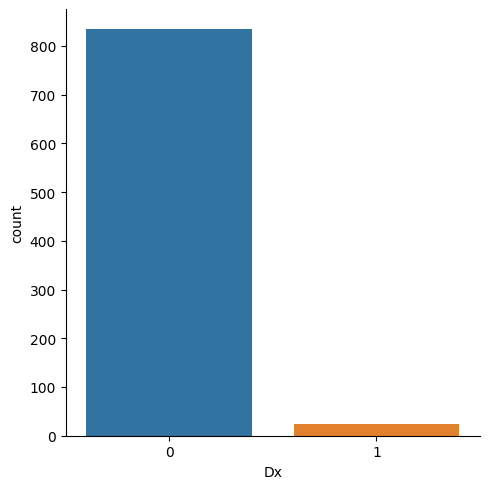

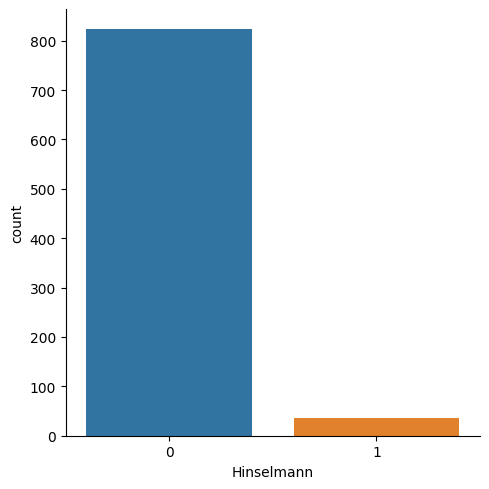

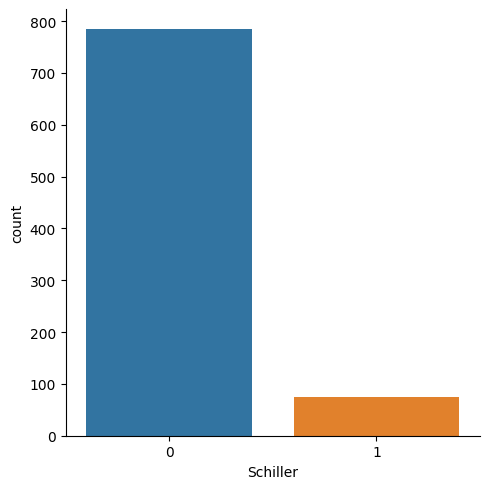

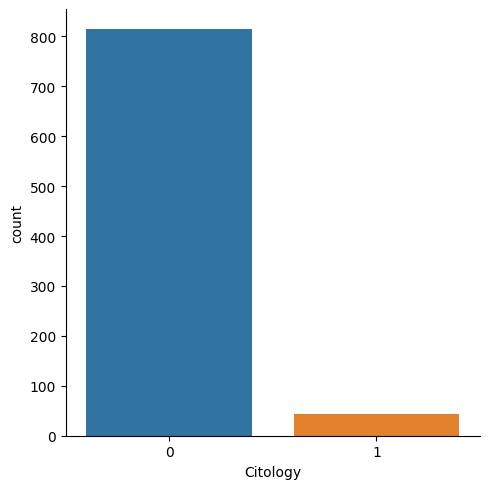

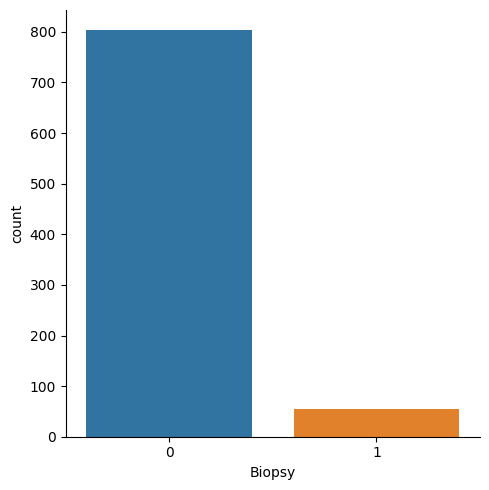

In [ ]:
import seaborn as sns

for feature in categorical_df:
    sns.catplot(x=feature, data=cancer_df, kind='count')

/usr/local/lib/python3.10/dist-packages/seaborn/axisgrid.py:447: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`). Consider using `matplotlib.pyplot.close()`.
  fig = plt.figure(figsize=figsize)


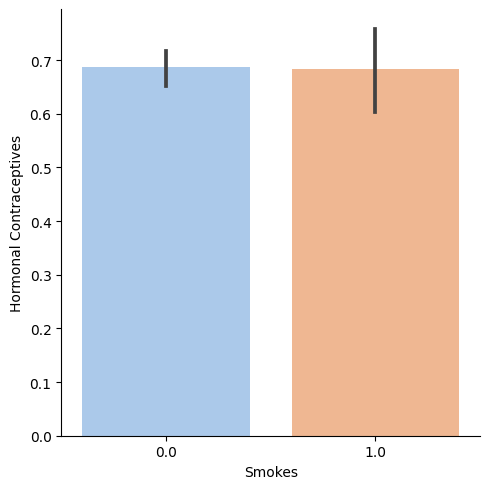

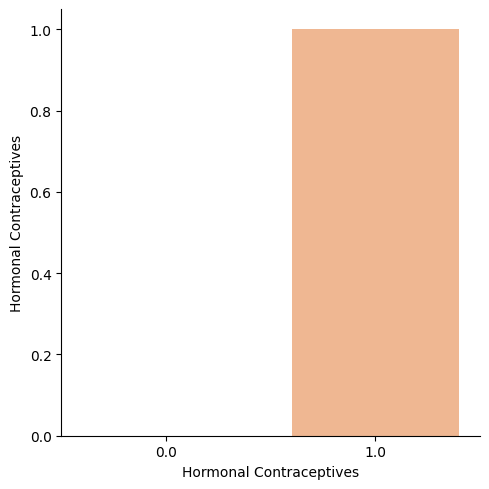

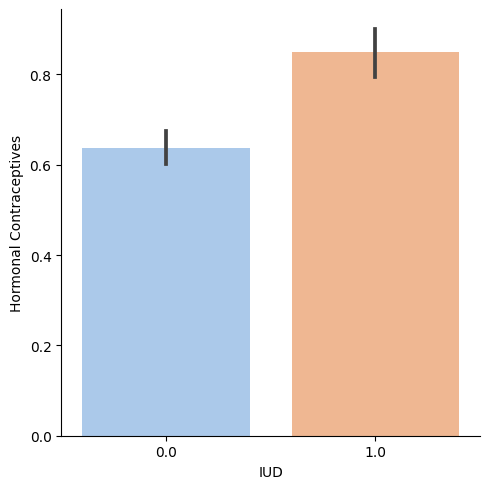

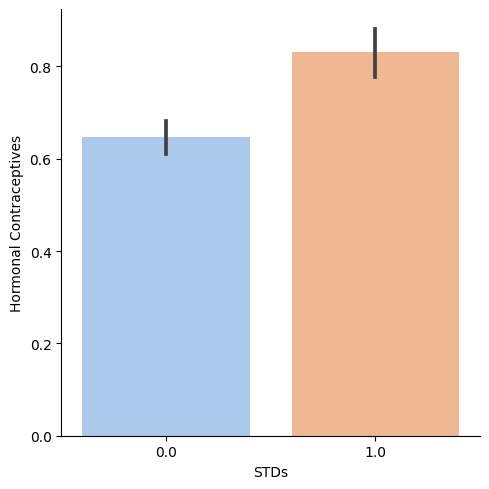

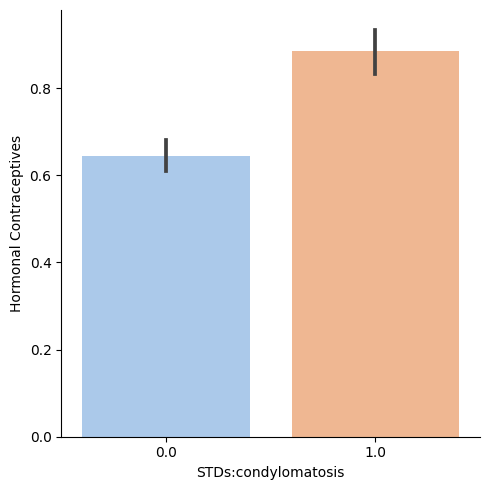

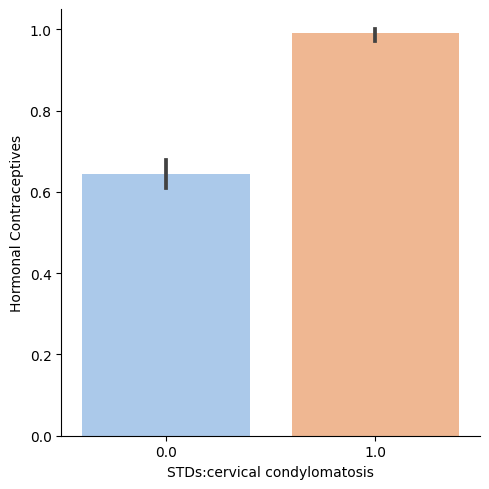

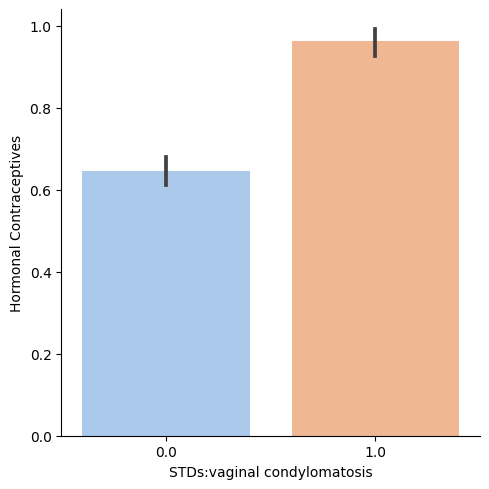

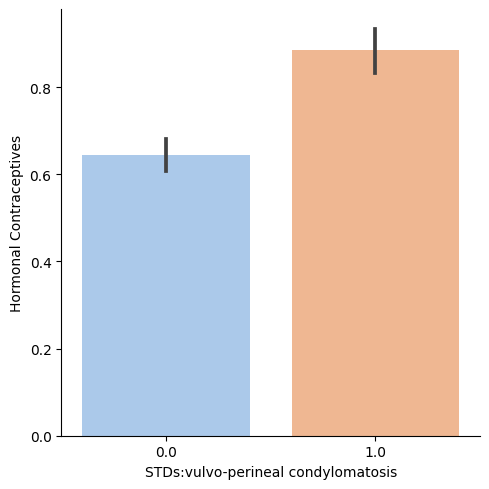

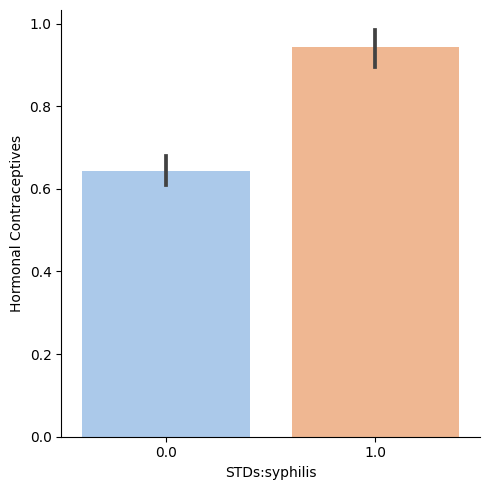

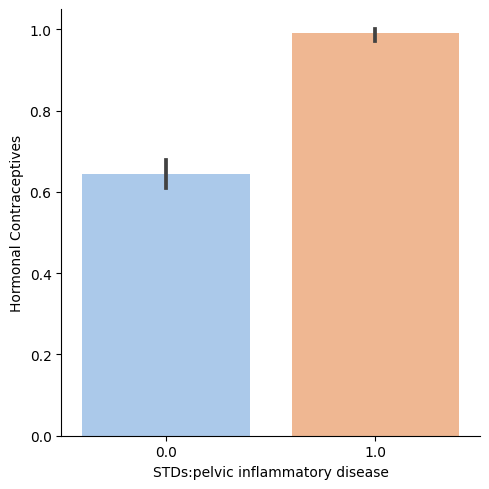

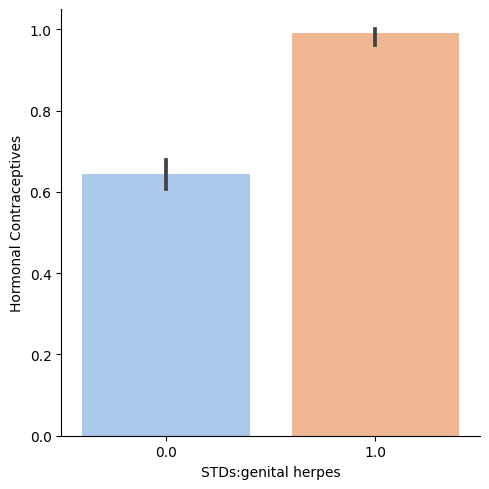

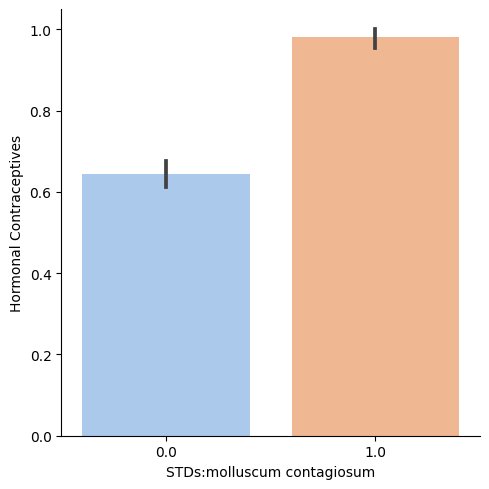

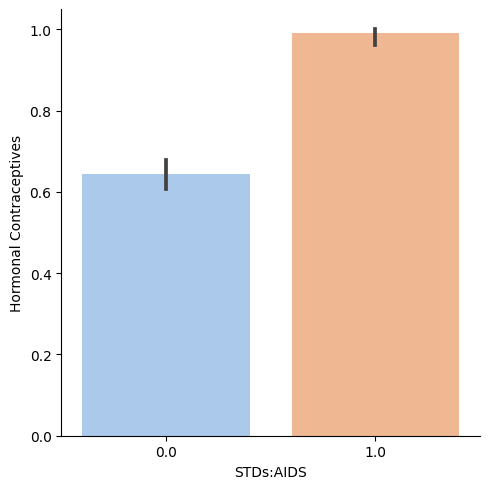

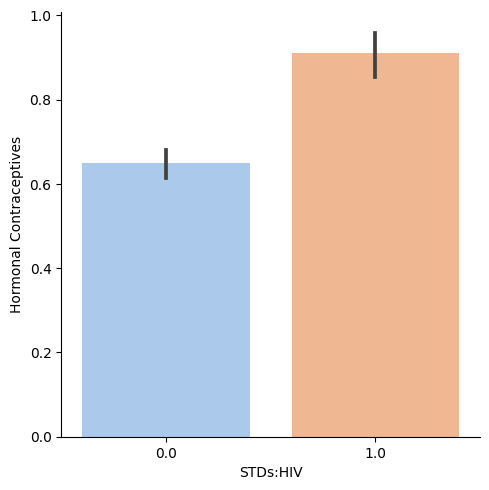

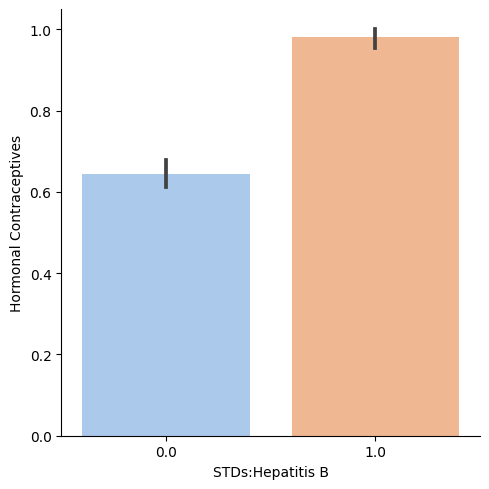

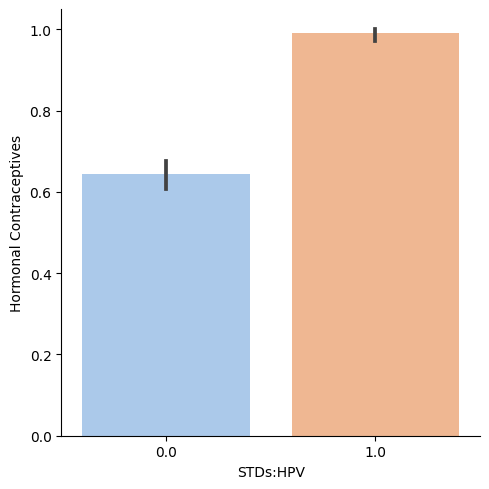

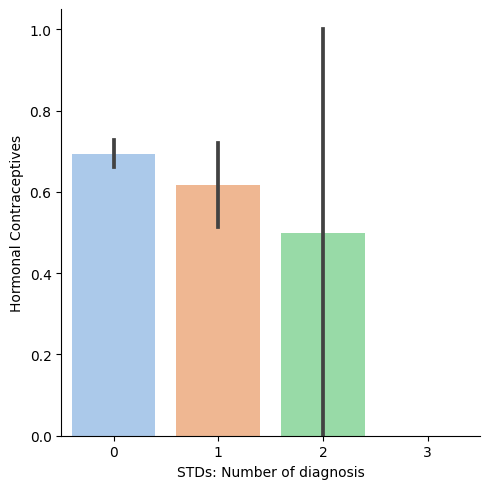

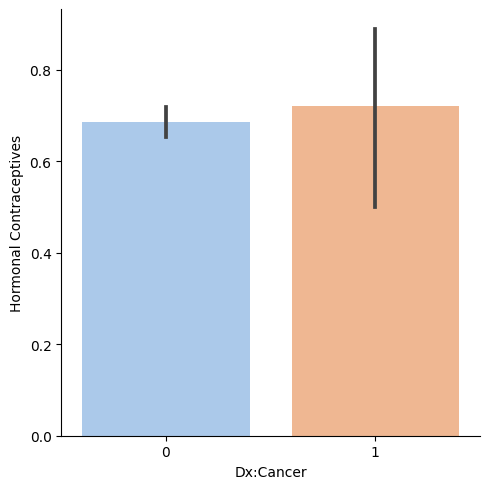

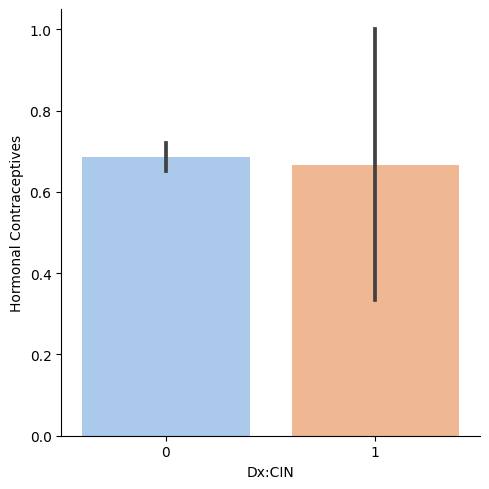

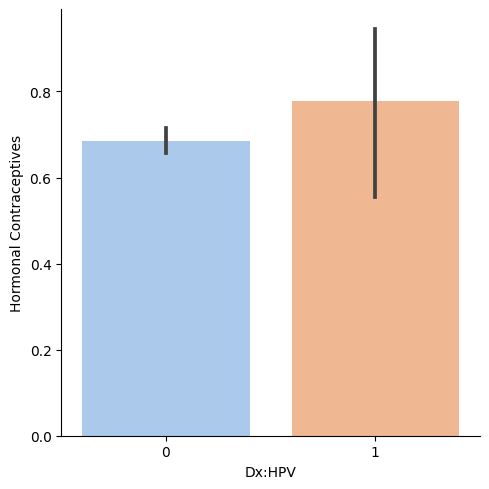

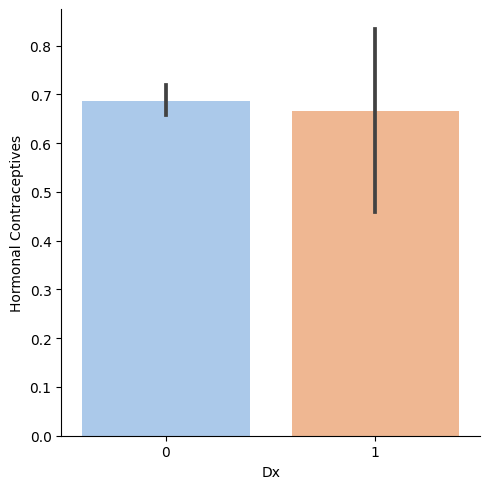

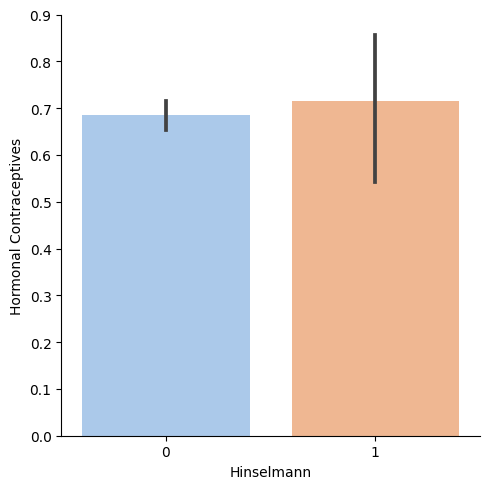

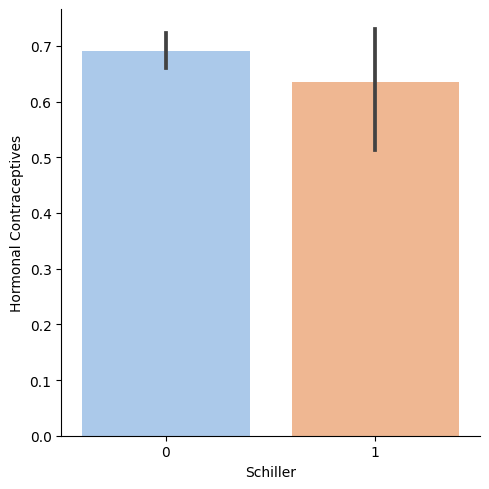

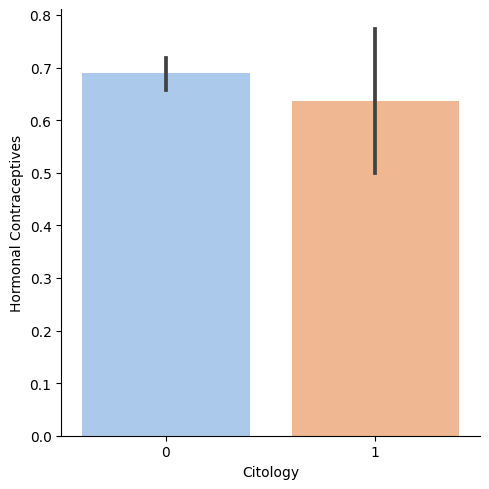

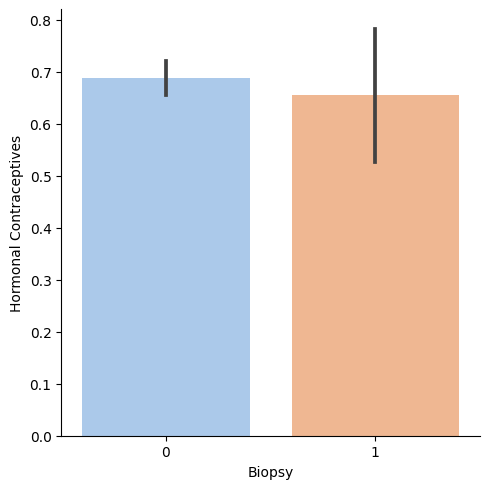

In [ ]:
import seaborn as sns

for category in categorical_df:
    sns.catplot(x=category, y="Hormonal Contraceptives", data=cancer_df, kind='bar', palette="pastel")

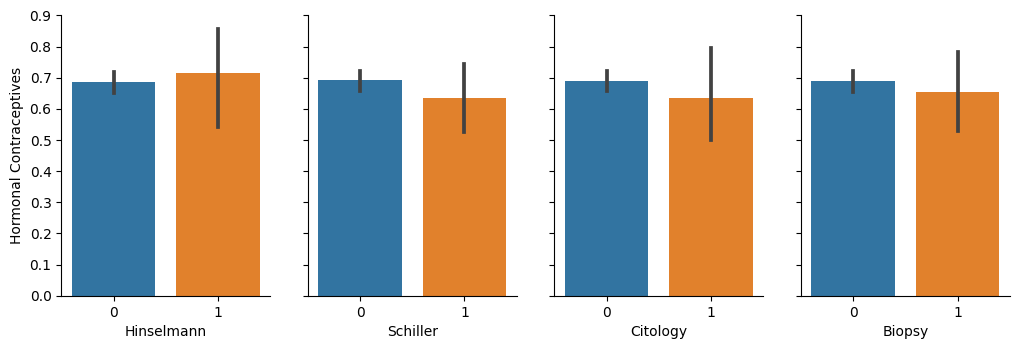

In [ ]:
import seaborn as sns
g = sns.PairGrid(cancer_df, y_vars=['Hormonal Contraceptives'], x_vars=category_df, aspect=.75, height=3.5)
g.map(sns.barplot, palette="pastel")

In [ ]:
cancer_df = cancer_df.replace('?', np.NaN)

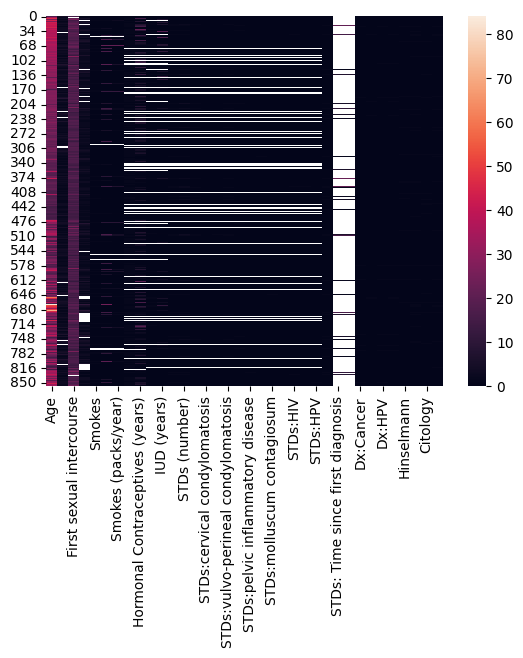

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.preprocessing import MinMaxScaler

csv_data = '/content/risk_factors_cervical_cancer.csv'
data = pd.read_csv(csv_data)
data = pd.read_csv(csv_data, na_values='?')
scaler = MinMaxScaler()
normalized_data = scaler.fit_transform(data)
sns.heatmap(data)
plt.show()

SVM classifier

In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import StandardScaler

data = pd.read_csv("/content/risk_factors_cervical_cancer.csv")

In [ ]:
data = data.replace('?', np.nan)
data = data.dropna()
data = data.astype(float)

In [ ]:
x = data.drop(['Biopsy'], axis=1)
y = data["Biopsy"]
corr_matrix=data.corr()
print(corr_matrix)

                                         Age  Number of sexual partners  \
Age                                 1.000000                   0.019085   
Number of sexual partners           0.019085                   1.000000   
First sexual intercourse            0.417327                  -0.263180   
Num of pregnancies                  0.398224                   0.190491   
Smokes                             -0.030046                   0.097282   
Smokes (years)                      0.122067                  -0.064774   
Smokes (packs/year)                 0.001618                   0.069233   
Hormonal Contraceptives             0.184877                   0.148389   
Hormonal Contraceptives (years)     0.276758                   0.068678   
IUD                                 0.193228                   0.086403   
IUD (years)                         0.202178                   0.132705   
STDs                                     NaN                        NaN   
STDs (number)            

In [ ]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size = 0.25,random_state = 1)
from sklearn.preprocessing import StandardScaler
st_x = StandardScaler()
x_train = st_x.fit_transform(x_train)
x_test = st_x.transform(x_test)

In [ ]:
from sklearn.svm import SVC
classifier=SVC(kernel='linear',random_state=0)
classifier.fit(x_train,y_train)
y_pred = classifier.predict(x_test)

In [ ]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
print(confusion_matrix(y_test,y_pred))
print(accuracy_score(y_test,y_pred))

[[11  0]
 [ 2  2]]
0.8666666666666667


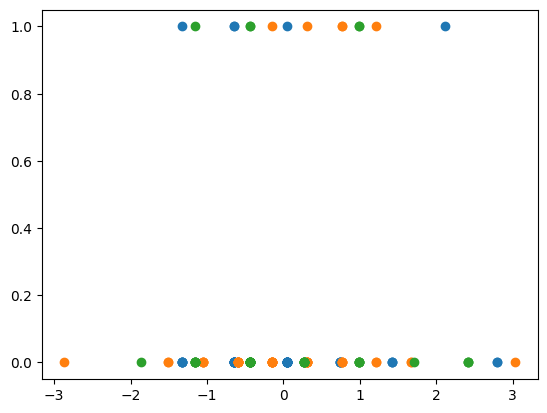

In [ ]:
import matplotlib.pyplot as mtp
mtp.scatter(x_train[:,1],y_train)
mtp.scatter(x_train[:,2],y_train)
mtp.scatter(x_train[:,3],y_train)
mtp.show()

Capsule Network

In [ ]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers

class CapsuleNetwork(keras.Model):
    def __init__(self, num_classes):
        super(CapsuleNetwork, self).__init__()
        self.conv1 = layers.Conv1D(8, kernel_size=3, activation='relu', padding='same')
        self.primary_caps = layers.Conv1D(8, kernel_size=3, activation='relu', padding='same')
        self.digit_caps = layers.Dense(num_classes, activation='sigmoid')

    def call(self, inputs):
        x = tf.expand_dims(inputs, axis=-1)  # Add channel dimension as the last dimension
        x = self.conv1(x)
        x = self.primary_caps(x)
        x = layers.Flatten()(x)
        x = self.digit_caps(x)
        return x

num_classes = 8

model = CapsuleNetwork(num_classes)

model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# Assuming you have x_train, y_train, x_test, and y_test defined and properly formatted

# One-hot encode the labels
y_train_encoded = tf.one_hot(y_train, num_classes)
y_test_encoded = tf.one_hot(y_test, num_classes)

model.fit(x_train, y_train_encoded, batch_size=32, epochs=3, validation_data=(x_test, y_test_encoded))

loss, accuracy = model.evaluate(x_test, y_test_encoded)
print("Test Loss:", loss)
print("Test Accuracy:", accuracy)


Epoch 1/3
2/2 [==============================] - 2s 275ms/step - loss: 0.6807 - accuracy: 0.3636 - val_loss: 0.6718 - val_accuracy: 0.6000
Epoch 2/3
2/2 [==============================] - 0s 67ms/step - loss: 0.6582 - accuracy: 0.5909 - val_loss: 0.6503 - val_accuracy: 0.7333
Epoch 3/3
1/1 [==============================] - 0s 31ms/step - loss: 0.6284 - accuracy: 0.7333
Test Loss: 0.6283982396125793
Test Accuracy: 0.7333333492279053


In [ ]:
import numpy as np

# Assuming your input data is stored in a variable called 'x_train' and 'x_test'
# Reshape the input data to add dimensions for batch size and channels
print(x_train.shape)
x_train = np.reshape(x_train, (-1, 35, 1, 1))
x_test = np.reshape(x_test, (-1, 35, 1, 1))
print(x_train.shape)
# Now the shape of x_train and x_test should be (batch_size, height, width, channels)

# Proceed with training and testing your model


(44, 35)
(44, 35, 1, 1)


Neural Network

In [ ]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error
from tensorflow import keras
from tensorflow.keras import layers

# Assuming you have x_train, y_train, x_test, and y_test defined and properly formatted

# Flatten the input data to 2D
x_train_flat = x_train.reshape(x_train.shape[0], -1)
x_test_flat = x_test.reshape(x_test.shape[0], -1)

# Normalize the input features
scaler = StandardScaler()
x_train_scaled = scaler.fit_transform(x_train_flat)
x_test_scaled = scaler.transform(x_test_flat)

# Reshape the scaled data back to the original shape
x_train_scaled = x_train_scaled.reshape(x_train.shape)
x_test_scaled = x_test_scaled.reshape(x_test.shape)

# Define the neural network model
model = keras.Sequential([

    layers.Dense(128, activation='relu'),

    layers.Flatten(input_shape=(x_train.shape[1:])),  # Flatten the input data if needed
    layers.Dense(32, activation='relu'),
    layers.Dense(1)  # Single output node for regression
])

# Compile the model
model.compile(optimizer='adam', loss='mean_squared_error', metrics=['accuracy', 'mean_absolute_error'])

model.fit(x_train_scaled, y_train, batch_size=32, epochs=3, validation_data=(x_test_scaled, y_test))

# Evaluate the model on the test set
loss,accuracy, mae = model.evaluate(x_test_scaled, y_test)
print("Test Loss:", loss)
print("Accuracy:",accuracy)
print("Test Mean Absolute Error:", mae)


Epoch 1/3
2/2 [==============================] - 1s 237ms/step - loss: 0.1301 - accuracy: 0.8864 - mean_absolute_error: 0.2154 - val_loss: 0.1394 - val_accuracy: 0.8000 - val_mean_absolute_error: 0.3155
Epoch 2/3
2/2 [==============================] - 0s 41ms/step - loss: 0.0872 - accuracy: 0.9091 - mean_absolute_error: 0.2377 - val_loss: 0.1314 - val_accuracy: 0.8667 - val_mean_absolute_error: 0.2429
Epoch 3/3
1/1 [==============================] - 0s 34ms/step - loss: 0.1227 - accuracy: 0.8667 - mean_absolute_error: 0.2215
Test Loss: 0.12265745550394058
Accuracy: 0.8666666746139526
Test Mean Absolute Error: 0.22146748006343842


In [ ]:
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import RobustScaler  # Import RobustScaler
from tensorflow import keras
from tensorflow.keras import layers
import pywt  # Import the PyWavelets library

# Assuming you have x_train, y_train, x_test, and y_test defined and properly formatted

# Define the wavelet transform function
def apply_wavelet_transform(data):
    coeffs = pywt.wavedec(data, 'haar', level=5)  # Use the 'haar' wavelet and level 5
    features = np.concatenate(coeffs)
    return features

# Apply wavelet transform to the training and test data
x_train_wavelet = np.array([apply_wavelet_transform(sample) for sample in x_train])
x_test_wavelet = np.array([apply_wavelet_transform(sample) for sample in x_test])

# Normalize the input features using RobustScaler
scaler = RobustScaler()  # Use RobustScaler instead of StandardScaler
x_train_scaled = scaler.fit_transform(x_train_wavelet)
x_test_scaled = scaler.fit_transform(x_test_wavelet)

# Reshape the scaled data to match the input shape of the CNN
# Assuming your input data is in the shape (num_samples, num_features)
# You should adapt this reshape based on your actual data dimensions
x_train_scaled = x_train_scaled.reshape(x_train_scaled.shape[0], x_train_scaled.shape[1], 1)
x_test_scaled = x_test_scaled.reshape(x_test_scaled.shape[0], x_test_scaled.shape[1], 1)

# Define the CNN model
model = keras.Sequential([
    layers.Conv1D(32, kernel_size=3, activation='relu', input_shape=(x_train_scaled.shape[1], 1)),
    layers.MaxPooling1D(pool_size=2),
    layers.Flatten(),
    layers.Dense(128, activation='relu'),
    layers.Dense(32, activation='relu'),
    layers.Dense(1)  # Single output node for regression
])

# Compile the model
model.compile(optimizer='adam', loss='mean_squared_error', metrics=['accuracy','mean_absolute_error'])

model.fit(x_train_scaled, y_train, batch_size=32, epochs=3, validation_data=(x_test_scaled, y_test))

# Evaluate the model on the test set
loss, mae = model.evaluate(x_test_scaled, y_test)
print("Test Loss:", loss)
print("Test Mean Absolute Error:", mae)


AxisError: ignored